# 계층적군집(3) - 다른 유형의 데이터 (MNIST 데이터셋)

MNIST : sklearn 내장 이미지 셋

## #01. 패키지

In [1]:
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame
from scipy.cluster.hierarchy import dendrogram, linkage

# sklearn은 AgglomerativeClustering() 함수를 제공
from sklearn.cluster import AgglomerativeClustering

# 표준화
from sklearn.preprocessing import StandardScaler

# 데이터 셋 불러오기
from sklearn.datasets import load_digits

## #02. 데이터 불러오기

### 전체 데이터셋 불러오기

In [3]:
digists = load_digits()
# digists

### 무작위로 20개 추출

#### 추출할 이미지 수, 랜덤 시드 고정

In [36]:
rnd_count = 50
np.random.seed(777)

#### 무작위 50개에 대한 인덱스 생성(무작위 표본 생성)

In [37]:
# 불러온 데이터의 길이에서 무작위로 50개를 추출
idx = np.random.choice(range(len(digists.data)), rnd_count)
idx

array([ 103,  815, 1595,  934, 1623,   71, 1693,  639,  116, 1447,  985,
        814, 1530,  792, 1319,  397,  654,   32,  321,  850,  340, 1349,
        577, 1567, 1211, 1127, 1098,  850, 1586, 1342,  967,  365,  836,
        824, 1350,  322,  202,   60,  967,  888, 1664,  819,  186,  642,
       1040,  355,  237, 1651,  171,  384])

#### 무작위 인덱스에 대한 표본 추출

In [38]:
x = digists.data[idx]   #digists.data에서 특정 인덱스(idx) 데이터만 추출
x.shape

(50, 64)

#### 데이터의 이미지 binary 정보 추출

In [39]:
images = digists.images[idx]
images.shape

(50, 8, 8)

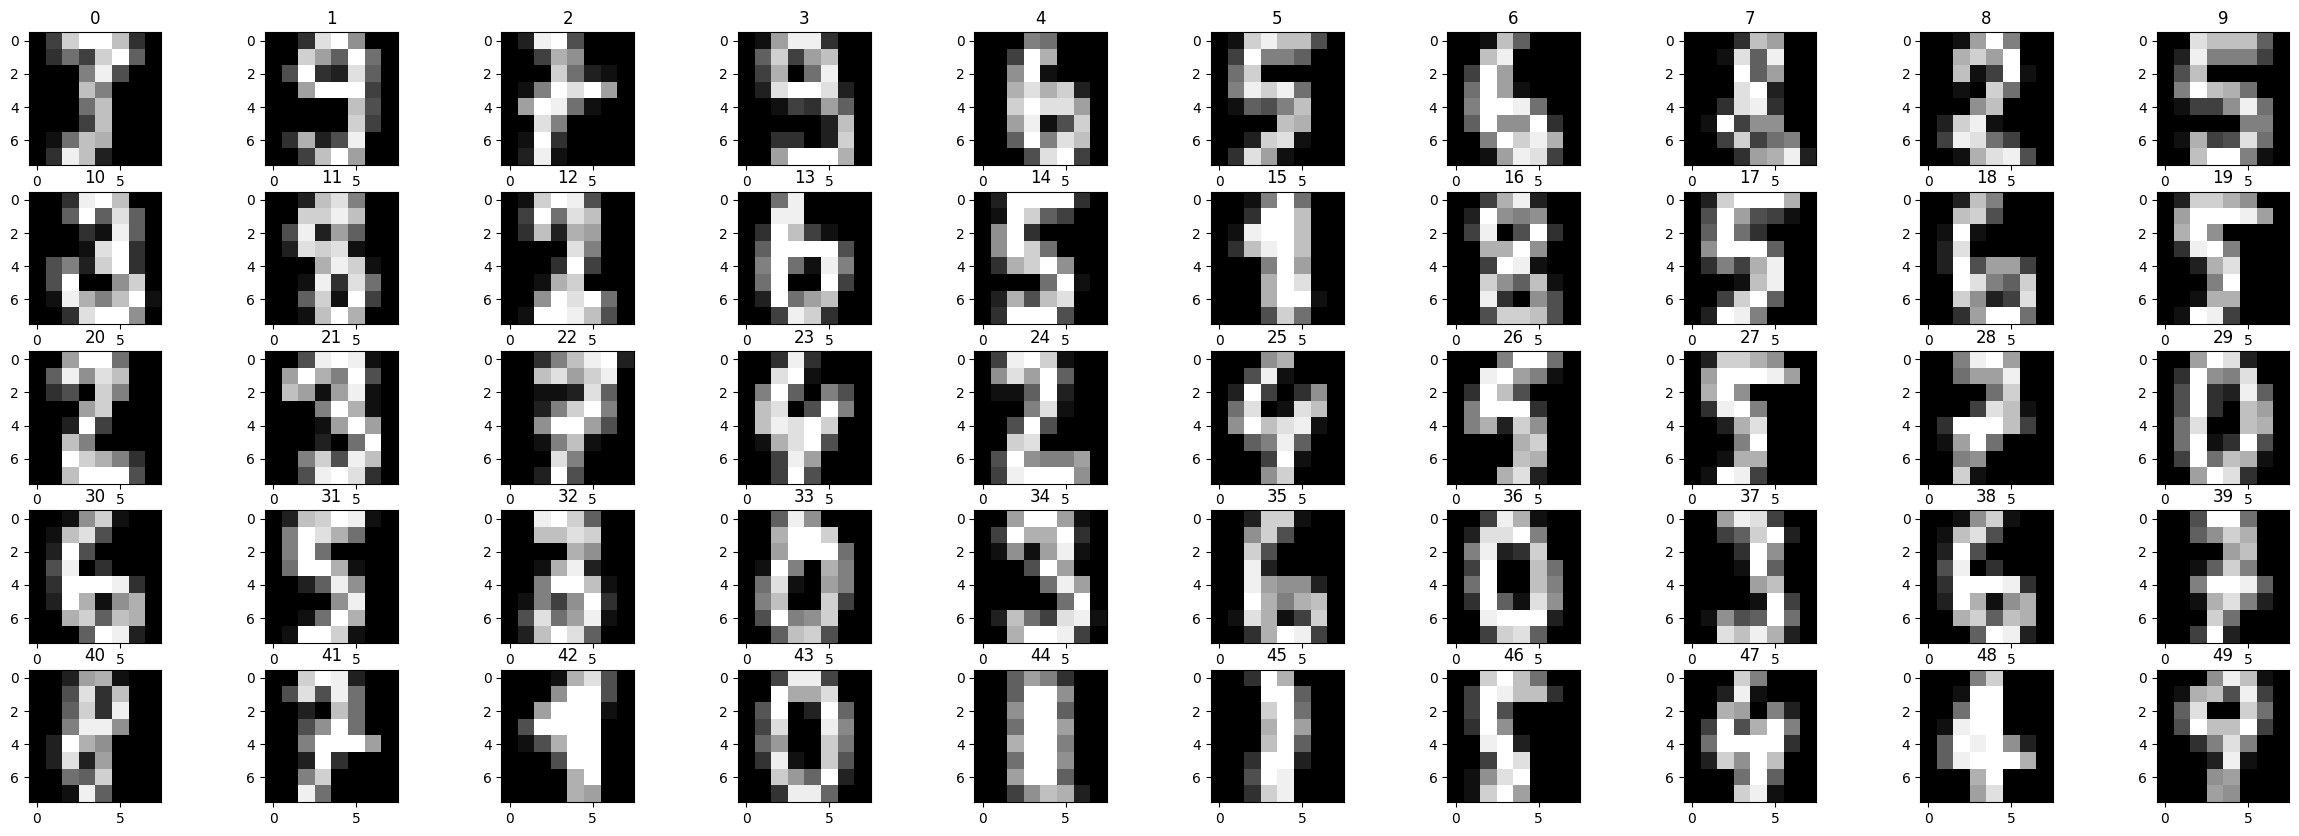

In [40]:
fig, ax = plt.subplots(5,10, figsize=(30, 10))

idx = 0
for i in range(0, 5):
    for j in range(0, 10):
        ax[i][j].imshow(images[idx], cmap='gray')
        ax[i][j].set_title(str(idx))
        idx+=1
plt.subplots_adjust(wspace=0.2, hspace=0.2)

## #03. 군집 수행

### method 파라미터

군집간의 거리를 구하는 방법

`single`(기본 값), `complete`, `average`, `weighted`, `centroid` 중 선택

> 참고 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

### metric 파라미터

> scipy.spatial.distance.pdist 클래스의 인스턴스

- `euclidean(직선)` : metric의 기본이며 점 사이의 `직선 거리 측정`
- `cityblock` : 점 사이의 `맨하탄 거리 측정(블록 형태)`
- `seuclidean` : 표준화된 유클리디안
- `sqeuclidean` : 제곱된 유클리디안
- `cosine` : 코사인 거리 계산
- 콜백함수 지정 가능

> 참고 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy-spatial-distance-pdist

In [41]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

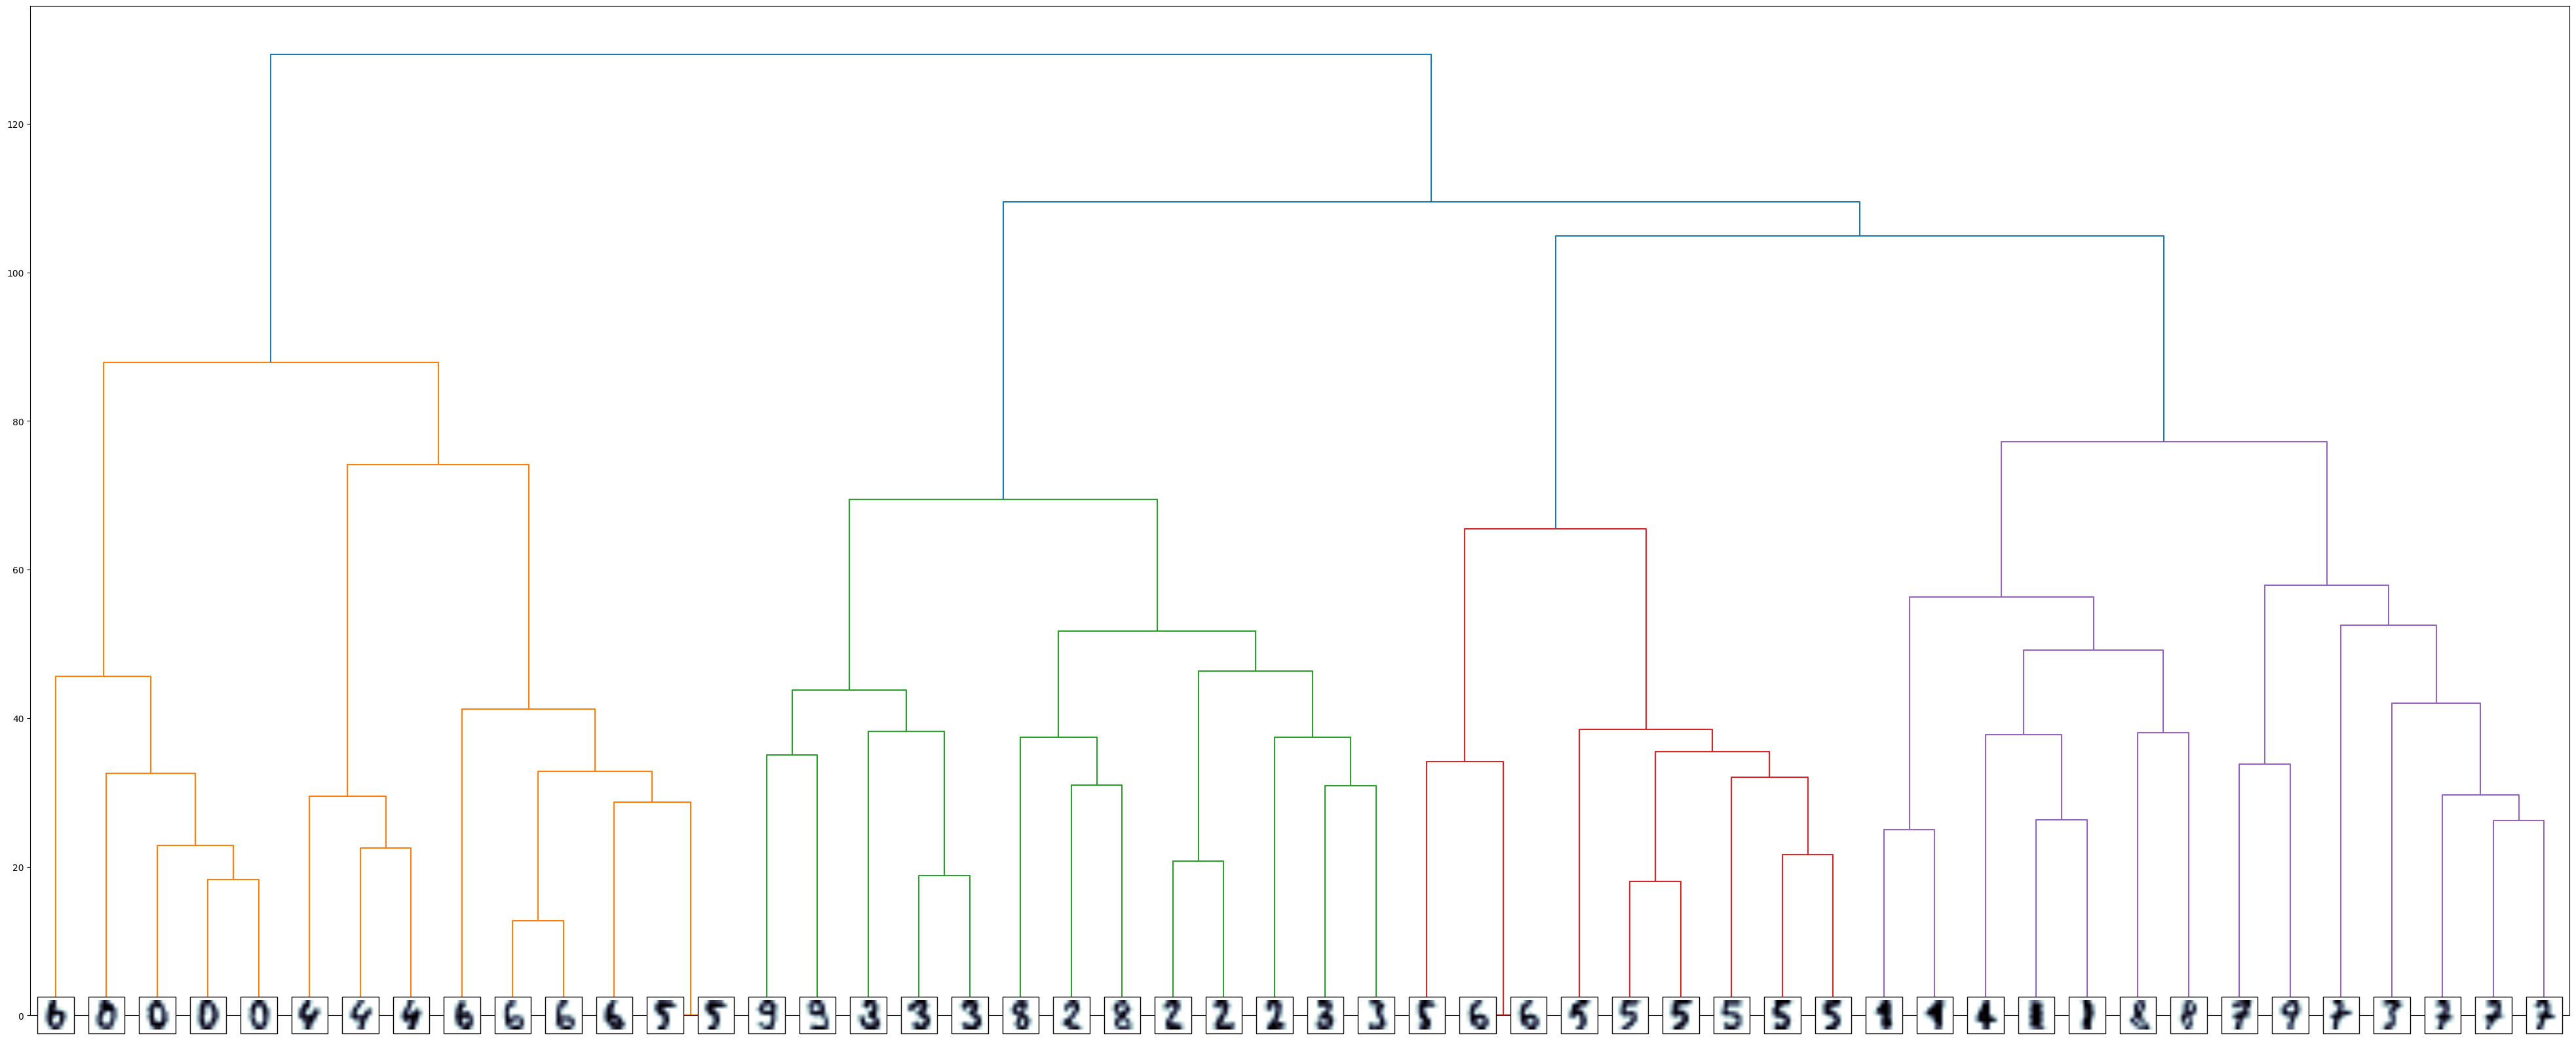

In [48]:
lnk = linkage(x, 'ward')

fig, ax = plt.subplots(1,1, figsize=(50,20))
r = dendrogram(lnk)

# 클러스터링 결과를 개별 변수로 추출(색상을 다르게 설정하기 위함)
icoord = np.array(r['icoord'])
dcoord = np.array(r['dcoord'])
leaves = np.array(r['leaves'])

idx = np.argsort(dcoord[:,2])   #dcoord의 2번째 열을 기준으로 정렬한 idx 값

icoord = icoord[idx]
dcoord = dcoord[idx]

# lnk[:,2].ravel()
idx = np.argsort(lnk[:, :2].ravel())
label_pos = icoord[:,1:3].ravel()[idx][:rnd_count]

for i in range(rnd_count):
    # 이미지 불러오기
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation="bilinear", zoom=4)
    # 이미지를 ABBox로 감싼다
    ab = AnnotationBbox(imagebox, (label_pos[i], 0))
    ax.add_artist(ab)

plt.show()
plt.close()

#### 색상이름 목록

`k`번째의 항목은 `k`번째 링크의 색상

In [17]:
print(r['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C0', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C0', 'C0', 'C0']


In [18]:
print(r['icoord'])

[[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [75.0, 75.0, 85.0, 85.0], [65.0, 65.0, 80.0, 80.0], [55.0, 55.0, 72.5, 72.5], [40.0, 40.0, 63.75, 63.75], [12.5, 12.5, 51.875, 51.875], [95.0, 95.0, 105.0, 105.0], [125.0, 125.0, 135.0, 135.0], [115.0, 115.0, 130.0, 130.0], [100.0, 100.0, 122.5, 122.5], [32.1875, 32.1875, 111.25, 111.25], [145.0, 145.0, 155.0, 155.0], [165.0, 165.0, 175.0, 175.0], [150.0, 150.0, 170.0, 170.0], [185.0, 185.0, 195.0, 195.0], [205.0, 205.0, 215.0, 215.0], [190.0, 190.0, 210.0, 210.0], [160.0, 160.0, 200.0, 200.0], [235.0, 235.0, 245.0, 245.0], [225.0, 225.0, 240.0, 240.0], [265.0, 265.0, 275.0, 275.0], [255.0, 255.0, 270.0, 270.0], [285.0, 285.0, 295.0, 295.0], [262.5, 262.5, 290.0, 290.0], [232.5, 232.5, 276.25, 276.25], [325.0, 325.0, 335.0, 335.0], [315.0, 315.0, 330.0, 330.0], [305.0, 305.0, 322.5, 322.5], [355.0, 355.0, 365.0, 365.0], [345.0, 345.0, 360.0, 360.0], [385.0, 385.0, 395.0, 395.0], [375.0, 375.0, 390.0, 390.0], [

In [19]:
print(r['dcoord'])

[[0.0, 20.12461179749811, 20.12461179749811, 0.0], [0.0, 40.10403138505322, 40.10403138505322, 20.12461179749811], [0.0, 36.61966684720111, 36.61966684720111, 0.0], [0.0, 26.362852652928137, 26.362852652928137, 0.0], [0.0, 30.304015135511886, 30.304015135511886, 26.362852652928137], [0.0, 40.6283972938469, 40.6283972938469, 30.304015135511886], [36.61966684720111, 52.80151512977634, 52.80151512977634, 40.6283972938469], [40.10403138505322, 62.62676034341159, 62.62676034341159, 52.80151512977634], [0.0, 21.047565179849187, 21.047565179849187, 0.0], [0.0, 26.038433132583073, 26.038433132583073, 0.0], [0.0, 35.07135583350036, 35.07135583350036, 26.038433132583073], [21.047565179849187, 62.85379861233529, 62.85379861233529, 35.07135583350036], [62.62676034341159, 86.31064235728398, 86.31064235728398, 62.85379861233529], [0.0, 18.33030277982336, 18.33030277982336, 0.0], [0.0, 24.535688292770594, 24.535688292770594, 0.0], [18.33030277982336, 28.478061731796284, 28.478061731796284, 24.5356882

In [20]:
print(r['leaves'])

[33, 3, 6, 1, 37, 29, 15, 10, 27, 11, 13, 2, 20, 38, 39, 48, 18, 47, 0, 46, 22, 36, 17, 8, 9, 43, 28, 45, 19, 24, 41, 16, 4, 30, 23, 14, 35, 40, 5, 12, 49, 34, 42, 21, 25, 7, 44, 32, 26, 31]


In [24]:
# 클러스터링 결과를 개별 변수로 추출
icoord = np.array(r['icoord'])
dcoord = np.array(r['dcoord'])
leaves = np.array(r['leaves'])

idx = np.argsort(dcoord[:,2])   #dcoord의 2번째 열을 기준으로 정렬한 idx 값

icoord = icoord[idx]
dcoord = dcoord[idx]

# lnk[:,2].ravel()
idx2 = np.argsort(lnk[:,2].ravel())
label_pos = icoord[:,1:3].ravel()[idx2]

In [43]:
lnk[:,2].ravel()

array([  0.        ,   0.        ,  12.68857754,  18.05547009,
        18.30300522,  18.84144368,  20.76053949,  21.65640783,
        22.49444376,  22.85461296,  24.97999199,  26.19160171,
        26.30589288,  28.72861524,  29.45052348,  29.65355516,
        30.85449724,  31.        ,  32.04684072,  32.56020065,
        32.85219424,  33.80828301,  34.15650255,  35.04283094,
        35.49084389,  37.38538039,  37.39875221,  37.73592453,
        38.        ,  38.22302971,  38.52358585,  41.21164884,
        42.01388659,  43.74471397,  45.5993421 ,  46.32853692,
        49.13654445,  51.67284909,  52.54236386,  56.33471399,
        57.90706841,  65.50742112,  69.44696371,  74.16198487,
        77.23341246,  87.91884786, 104.93152324, 109.46990698,
       129.38532706])